2025-11-11 03:44:04.249152: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-11 03:44:04.325054: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-11 03:44:05.953416: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/shubhamkn22/.conda/envs/new-gpu-env/lib/python3.10/site-packages/tqdm/auto

!!! FORCING SCRIPT TO RUN ON GPU 0 ONLY !!!
Enabled memory growth for 1 GPUs
 =================== Starting 3-Branch Keras Fusion Model Training =================== 
Loaded 6059 3D samples with shape (16, 16, 16, 16).
Removed 65 outliers
Data shape after advanced outlier removal: (5994, 16, 16, 16, 16)

 =================== Generating Magpie Features ===================


ElementProperty: 100%|█████████████████████| 5994/5994 [00:30<00:00, 198.38it/s]


Generated Magpie features with shape: (5994, 132)

 =================== Generating PCA & Scaled Features ===================
PCA complete. Explained variance: 0.8252

 =================== Creating advanced data splits =================== 
3D CNN splits -> Train: (4795, 16, 16, 16, 16), Val: (599, 16, 16, 16, 16)
PCA splits -> Train: (4795, 512), Val: (599, 512)
Magpie splits -> Train: (4795, 132), Val: (599, 132)
 Using batch size: 8

 =================== Training 3-Branch Keras Fusion Model ===================


I0000 00:00:1762812992.945828 2174894 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 33608 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:2b:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_3d            │ (None, 16, 16,    │          0 │ -                 │
│ (InputLayer)        │ 16, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_flip3d       │ (None, 16, 16,    │          0 │ input_3d[0][0]    │
│ (RandomFlip3D)      │ 16, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 16, 16,    │     27,712 │ random_flip3d[0]… │
│                     │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 16,    │        256 │ conv3d[0][0]      │
│ (BatchNormalizatio… │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (Activation)        │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 8, 8, 8,   │          0 │ activation[0][0]  │
│ (MaxPooling3D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 8, 8, 8,   │    110,656 │ max_pooling3d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 8,   │        256 │ conv3d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 8, 8, 8,   │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 8, 8, 8,   │    110,656 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 8,   │        256 │ conv3d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dual_attention3d    │ (None, 8, 8, 8,   │      1,261 │ batch_normalizat… │
│ (DualAttention3D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 8, 8, 8,   │          0 │ dual_attention3d… │
│                     │ 64)               │            │ max_pooling3d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 8, 8, 8,   │          0 │ add_1[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_5 (Conv3D)   │ (None, 8, 8, 8,   │    110,656 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 8,   │        256 │ conv3d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 8, 8, 8,   │          0 │ batch_normalizat

 Total params: 8,873,605 (33.85 MB)

 Trainable params: 8,866,437 (33.82 MB)

 Non-trainable params: 7,168 (28.00 KB)

Epoch 1/300


2025-11-11 03:46:36.402939: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_17}}
2025-11-11 03:46:54.661767: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91500


600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.7993 - mae: 1.1212

2025-11-11 03:47:25.617738: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_17}}



Epoch 1: val_loss improved from None to 0.26887, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 53s 54ms/step - loss: 0.7176 - mae: 1.0335 - val_loss: 0.2689 - val_mae: 0.4925 - learning_rate: 1.0000e-04
Epoch 2/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5803 - mae: 0.8808
Epoch 2: val_loss improved from 0.26887 to 0.25186, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.5545 - mae: 0.8505 - val_loss: 0.2519 - val_mae: 0.4419 - learning_rate: 1.0000e-04
Epoch 3/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5272 - mae: 0.8216
Epoch 3: val_loss improved from 0.25186 to 0.22601, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.5043 - mae: 0.7930 - val_loss: 0.2260 - val_mae: 0.4021 - learning_rate: 1.0000e-04
Epoch 4/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4463 - mae: 0.7255
Epoch 4: val_loss improved from 0.22601 to 0.20659, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.4348 - mae: 0.7109 - val_loss: 0.2066 - val_mae: 0.3675 - learning_rate: 1.0000e-04
Epoch 5/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4001 - mae: 0.6651
Epoch 5: val_loss improved from 0.20659 to 0.18218, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.3890 - mae: 0.6509 - val_loss: 0.1822 - val_mae: 0.3321 - learning_rate: 1.0000e-04
Epoch 6/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3538 - mae: 0.6094
Epoch 6: val_loss did not improve from 0.18218
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.3405 - mae: 0.5906 - val_loss: 0.1910 - val_mae: 0.3419 - learning_rate: 1.0000e-04
Epoch 7/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3169 - mae: 0.5603
Epoch 7: val_loss did not improve from 0.18218
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.3098 - mae: 0.5488 - val_loss: 0.2039 - val_mae: 0.3900 - learning_rate: 1.0000e-04
Epoch 8/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2977 - mae: 0.5273
Epoch 8: val_loss improved from 0.18218 to 0.16005, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.2894 - mae: 0.5167 - val_loss: 0.1600 - val_mae: 0.2853 - learning_rate: 1.0000e-04
Epoch 9/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2605 - mae: 0.4760
Epoch 9: val_loss did not improve from 0.16005
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.2611 - mae: 0.4758 - val_loss: 0.1790 - val_mae: 0.3196 - learning_rate: 1.0000e-04
Epoch 10/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2469 - mae: 0.4587
Epoch 10: val_loss improved from 0.16005 to 0.15877, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.2462 - mae: 0.4552 - val_loss: 0.1588 - val_mae: 0.2822 - learning_rate: 1.0000e-04
Epoch 11/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2308 - mae: 0.4316
Epoch 11: val_loss improved from 0.15877 to 0.15222, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.2293 - mae: 0.4265 - val_loss: 0.1522 - val_mae: 0.2730 - learning_rate: 1.0000e-04
Epoch 12/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2205 - mae: 0.4163
Epoch 12: val_loss improved from 0.15222 to 0.14470, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.2194 - mae: 0.4119 - val_loss: 0.1447 - val_mae: 0.2593 - learning_rate: 1.0000e-04
Epoch 13/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2063 - mae: 0.3887
Epoch 13: val_loss improved from 0.14470 to 0.13993, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - loss: 0.2054 - mae: 0.3868 - val_loss: 0.1399 - val_mae: 0.2496 - learning_rate: 1.0000e-04
Epoch 14/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2011 - mae: 0.3848
Epoch 14: val_loss improved from 0.13993 to 0.13871, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.2011 - mae: 0.3818 - val_loss: 0.1387 - val_mae: 0.2490 - learning_rate: 1.0000e-04
Epoch 15/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1950 - mae: 0.3716
Epoch 15: val_loss did not improve from 0.13871
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.1937 - mae: 0.3692 - val_loss: 0.1659 - val_mae: 0.3104 - learning_rate: 1.0000e-04
Epoch 16/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1839 - mae: 0.3512
Epoch 16: val_loss improved from 0.13871 to 0.13429, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.1845 - mae: 0.3528 - val_loss: 0.1343 - val_mae: 0.2454 - learning_rate: 1.0000e-04
Epoch 17/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1770 - mae: 0.3430
Epoch 17: val_loss did not improve from 0.13429
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - loss: 0.1804 - mae: 0.3485 - val_loss: 0.1383 - val_mae: 0.2513 - learning_rate: 1.0000e-04
Epoch 18/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1765 - mae: 0.3399
Epoch 18: val_loss improved from 0.13429 to 0.13052, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - loss: 0.1752 - mae: 0.3407 - val_loss: 0.1305 - val_mae: 0.2428 - learning_rate: 1.0000e-04
Epoch 19/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1693 - mae: 0.3335
Epoch 19: val_loss did not improve from 0.13052
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - loss: 0.1703 - mae: 0.3351 - val_loss: 0.1329 - val_mae: 0.2570 - learning_rate: 1.0000e-04
Epoch 20/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1649 - mae: 0.3263
Epoch 20: val_loss did not improve from 0.13052
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.1649 - mae: 0.3270 - val_loss: 0.1352 - val_mae: 0.2632 - learning_rate: 1.0000e-04
Epoch 21/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1583 - mae: 0.3186
Epoch 21: val_loss improved from 0.13052 to 0.12461, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.1574 - mae: 0.3153 - val_loss: 0.1246 - val_mae: 0.2399 - learning_rate: 1.0000e-04
Epoch 22/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1533 - mae: 0.3106
Epoch 22: val_loss did not improve from 0.12461
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.1536 - mae: 0.3109 - val_loss: 0.1287 - val_mae: 0.2565 - learning_rate: 1.0000e-04
Epoch 23/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1522 - mae: 0.3116
Epoch 23: val_loss did not improve from 0.12461
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - loss: 0.1499 - mae: 0.3069 - val_loss: 0.1292 - val_mae: 0.2646 - learning_rate: 1.0000e-04
Epoch 24/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1441 - mae: 0.2976
Epoch 24: val_loss did not improve from 0.12461
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.1446 - mae: 0.2999 - val_loss: 0.1402 - val_mae: 0.3017 - learning_rate: 1.0000e-04
Epoch 25/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step -

600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.1331 - mae: 0.2831 - val_loss: 0.1229 - val_mae: 0.2508 - learning_rate: 1.0000e-04
Epoch 27/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1274 - mae: 0.2785
Epoch 27: val_loss improved from 0.12288 to 0.11963, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.1286 - mae: 0.2806 - val_loss: 0.1196 - val_mae: 0.2503 - learning_rate: 1.0000e-04
Epoch 28/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1274 - mae: 0.2807
Epoch 28: val_loss improved from 0.11963 to 0.11506, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.1263 - mae: 0.2765 - val_loss: 0.1151 - val_mae: 0.2355 - learning_rate: 1.0000e-04
Epoch 29/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1203 - mae: 0.2671
Epoch 29: val_loss did not improve from 0.11506
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - loss: 0.1189 - mae: 0.2646 - val_loss: 0.1215 - val_mae: 0.2587 - learning_rate: 1.0000e-04
Epoch 30/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1159 - mae: 0.2586
Epoch 30: val_loss did not improve from 0.11506
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - loss: 0.1152 - mae: 0.2578 - val_loss: 0.1179 - val_mae: 0.2565 - learning_rate: 1.0000e-04
Epoch 31/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1135 - mae: 0.2606
Epoch 31: val_loss did not improve from 0.11506
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 0.1133 - mae: 0.2579 - val_loss: 0.1431 - val_mae: 0.3002 - learning_rate: 1.0000e-04
Epoch 32/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step -

600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.1093 - mae: 0.2498 - val_loss: 0.1119 - val_mae: 0.2397 - learning_rate: 1.0000e-04
Epoch 33/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1060 - mae: 0.2475
Epoch 33: val_loss improved from 0.11194 to 0.10665, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.1057 - mae: 0.2476 - val_loss: 0.1067 - val_mae: 0.2357 - learning_rate: 1.0000e-04
Epoch 34/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1053 - mae: 0.2459
Epoch 34: val_loss did not improve from 0.10665
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.1039 - mae: 0.2426 - val_loss: 0.1096 - val_mae: 0.2446 - learning_rate: 1.0000e-04
Epoch 35/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1001 - mae: 0.2382
Epoch 35: val_loss improved from 0.10665 to 0.10644, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 0.1006 - mae: 0.2401 - val_loss: 0.1064 - val_mae: 0.2352 - learning_rate: 1.0000e-04
Epoch 36/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0991 - mae: 0.2385
Epoch 36: val_loss did not improve from 0.10644
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0978 - mae: 0.2360 - val_loss: 0.1109 - val_mae: 0.2571 - learning_rate: 1.0000e-04
Epoch 37/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0956 - mae: 0.2321
Epoch 37: val_loss did not improve from 0.10644
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.0938 - mae: 0.2280 - val_loss: 0.1079 - val_mae: 0.2479 - learning_rate: 1.0000e-04
Epoch 38/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0922 - mae: 0.2273
Epoch 38: val_loss improved from 0.10644 to 0.10630, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.0922 - mae: 0.2290 - val_loss: 0.1063 - val_mae: 0.2422 - learning_rate: 1.0000e-04
Epoch 39/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0892 - mae: 0.2243
Epoch 39: val_loss improved from 0.10630 to 0.10006, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0892 - mae: 0.2243 - val_loss: 0.1001 - val_mae: 0.2333 - learning_rate: 1.0000e-04
Epoch 40/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0868 - mae: 0.2196
Epoch 40: val_loss did not improve from 0.10006
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - loss: 0.0859 - mae: 0.2191 - val_loss: 0.1141 - val_mae: 0.2733 - learning_rate: 1.0000e-04
Epoch 41/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0862 - mae: 0.2209
Epoch 41: val_loss did not improve from 0.10006
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.0847 - mae: 0.2168 - val_loss: 0.1003 - val_mae: 0.2402 - learning_rate: 1.0000e-04
Epoch 42/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0826 - mae: 0.2150
Epoch 42: val_loss improved from 0.10006 to 0.09980, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0823 - mae: 0.2162 - val_loss: 0.0998 - val_mae: 0.2411 - learning_rate: 1.0000e-04
Epoch 43/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0814 - mae: 0.2124
Epoch 43: val_loss did not improve from 0.09980
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.0802 - mae: 0.2101 - val_loss: 0.1018 - val_mae: 0.2438 - learning_rate: 1.0000e-04
Epoch 44/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0790 - mae: 0.2084
Epoch 44: val_loss improved from 0.09980 to 0.09919, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0776 - mae: 0.2076 - val_loss: 0.0992 - val_mae: 0.2489 - learning_rate: 1.0000e-04
Epoch 45/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0769 - mae: 0.2088
Epoch 45: val_loss did not improve from 0.09919
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.0752 - mae: 0.2037 - val_loss: 0.0997 - val_mae: 0.2426 - learning_rate: 1.0000e-04
Epoch 46/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0734 - mae: 0.2020
Epoch 46: val_loss improved from 0.09919 to 0.09732, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0735 - mae: 0.2017 - val_loss: 0.0973 - val_mae: 0.2385 - learning_rate: 1.0000e-04
Epoch 47/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0740 - mae: 0.2028
Epoch 47: val_loss did not improve from 0.09732
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0733 - mae: 0.2019 - val_loss: 0.1003 - val_mae: 0.2556 - learning_rate: 1.0000e-04
Epoch 48/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0691 - mae: 0.1952
Epoch 48: val_loss did not improve from 0.09732
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0698 - mae: 0.1973 - val_loss: 0.1050 - val_mae: 0.2634 - learning_rate: 1.0000e-04
Epoch 49/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0699 - mae: 0.1983
Epoch 49: val_loss improved from 0.09732 to 0.09506, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - loss: 0.0698 - mae: 0.1981 - val_loss: 0.0951 - val_mae: 0.2443 - learning_rate: 1.0000e-04
Epoch 50/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0708 - mae: 0.2018
Epoch 50: val_loss did not improve from 0.09506
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.0696 - mae: 0.1980 - val_loss: 0.0959 - val_mae: 0.2541 - learning_rate: 1.0000e-04
Epoch 51/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0675 - mae: 0.1952
Epoch 51: val_loss improved from 0.09506 to 0.09485, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.0660 - mae: 0.1924 - val_loss: 0.0949 - val_mae: 0.2503 - learning_rate: 1.0000e-04
Epoch 52/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0676 - mae: 0.1982
Epoch 52: val_loss improved from 0.09485 to 0.08967, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0652 - mae: 0.1928 - val_loss: 0.0897 - val_mae: 0.2361 - learning_rate: 1.0000e-04
Epoch 53/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0648 - mae: 0.1938
Epoch 53: val_loss did not improve from 0.08967
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - loss: 0.0645 - mae: 0.1932 - val_loss: 0.0967 - val_mae: 0.2603 - learning_rate: 1.0000e-04
Epoch 54/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0631 - mae: 0.1881
Epoch 54: val_loss improved from 0.08967 to 0.08694, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - loss: 0.0628 - mae: 0.1888 - val_loss: 0.0869 - val_mae: 0.2323 - learning_rate: 1.0000e-04
Epoch 55/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0611 - mae: 0.1866
Epoch 55: val_loss improved from 0.08694 to 0.08417, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 0.0597 - mae: 0.1822 - val_loss: 0.0842 - val_mae: 0.2245 - learning_rate: 1.0000e-04
Epoch 56/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0600 - mae: 0.1852
Epoch 56: val_loss did not improve from 0.08417
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0591 - mae: 0.1824 - val_loss: 0.0862 - val_mae: 0.2305 - learning_rate: 1.0000e-04
Epoch 57/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0606 - mae: 0.1879
Epoch 57: val_loss did not improve from 0.08417
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - loss: 0.0601 - mae: 0.1882 - val_loss: 0.0950 - val_mae: 0.2621 - learning_rate: 1.0000e-04
Epoch 58/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0582 - mae: 0.1821
Epoch 58: val_loss did not improve from 0.08417
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - loss: 0.0569 - mae: 0.1794 - val_loss: 0.0874 - val_mae: 0.2445 - learning_rate: 1.0000e-04
Epoch 59/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step -

600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0522 - mae: 0.1757 - val_loss: 0.0804 - val_mae: 0.2359 - learning_rate: 1.0000e-04
Epoch 63/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0541 - mae: 0.1821
Epoch 63: val_loss did not improve from 0.08041
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - loss: 0.0534 - mae: 0.1803 - val_loss: 0.0822 - val_mae: 0.2373 - learning_rate: 1.0000e-04
Epoch 64/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0532 - mae: 0.1817
Epoch 64: val_loss did not improve from 0.08041
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - loss: 0.0520 - mae: 0.1768 - val_loss: 0.0813 - val_mae: 0.2438 - learning_rate: 1.0000e-04
Epoch 65/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0506 - mae: 0.1756
Epoch 65: val_loss improved from 0.08041 to 0.07992, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0496 - mae: 0.1721 - val_loss: 0.0799 - val_mae: 0.2384 - learning_rate: 1.0000e-04
Epoch 66/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0501 - mae: 0.1753
Epoch 66: val_loss did not improve from 0.07992
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0491 - mae: 0.1722 - val_loss: 0.0905 - val_mae: 0.2590 - learning_rate: 1.0000e-04
Epoch 67/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0488 - mae: 0.1717
Epoch 67: val_loss did not improve from 0.07992
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - loss: 0.0479 - mae: 0.1692 - val_loss: 0.0826 - val_mae: 0.2446 - learning_rate: 1.0000e-04
Epoch 68/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0476 - mae: 0.1692
Epoch 68: val_loss did not improve from 0.07992
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 0.0472 - mae: 0.1690 - val_loss: 0.0843 - val_mae: 0.2496 - learning_rate: 1.0000e-04
Epoch 69/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step -

600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0449 - mae: 0.1658 - val_loss: 0.0790 - val_mae: 0.2316 - learning_rate: 1.0000e-04
Epoch 71/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0437 - mae: 0.1640
Epoch 71: val_loss improved from 0.07901 to 0.07748, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0442 - mae: 0.1648 - val_loss: 0.0775 - val_mae: 0.2336 - learning_rate: 1.0000e-04
Epoch 72/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0444 - mae: 0.1655
Epoch 72: val_loss improved from 0.07748 to 0.07011, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0446 - mae: 0.1672 - val_loss: 0.0701 - val_mae: 0.2169 - learning_rate: 1.0000e-04
Epoch 73/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0443 - mae: 0.1658
Epoch 73: val_loss did not improve from 0.07011
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - loss: 0.0445 - mae: 0.1672 - val_loss: 0.0792 - val_mae: 0.2535 - learning_rate: 1.0000e-04
Epoch 74/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0422 - mae: 0.1597
Epoch 74: val_loss did not improve from 0.07011
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.0421 - mae: 0.1614 - val_loss: 0.0799 - val_mae: 0.2546 - learning_rate: 1.0000e-04
Epoch 75/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0437 - mae: 0.1673
Epoch 75: val_loss did not improve from 0.07011
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 0.0427 - mae: 0.1649 - val_loss: 0.0751 - val_mae: 0.2432 - learning_rate: 1.0000e-04
Epoch 76/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step -

600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0400 - mae: 0.1623 - val_loss: 0.0680 - val_mae: 0.2199 - learning_rate: 1.0000e-04
Epoch 80/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0400 - mae: 0.1626
Epoch 80: val_loss did not improve from 0.06799
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - loss: 0.0391 - mae: 0.1611 - val_loss: 0.0717 - val_mae: 0.2292 - learning_rate: 1.0000e-04
Epoch 81/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0374 - mae: 0.1567
Epoch 81: val_loss did not improve from 0.06799
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0371 - mae: 0.1566 - val_loss: 0.0687 - val_mae: 0.2313 - learning_rate: 1.0000e-04
Epoch 82/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0373 - mae: 0.1574
Epoch 82: val_loss did not improve from 0.06799
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.0371 - mae: 0.1572 - val_loss: 0.0717 - val_mae: 0.2309 - learning_rate: 1.0000e-04
Epoch 83/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step -

600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.0350 - mae: 0.1536 - val_loss: 0.0667 - val_mae: 0.2248 - learning_rate: 1.0000e-04
Epoch 86/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0349 - mae: 0.1539
Epoch 86: val_loss did not improve from 0.06668
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - loss: 0.0341 - mae: 0.1520 - val_loss: 0.0671 - val_mae: 0.2342 - learning_rate: 1.0000e-04
Epoch 87/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0349 - mae: 0.1533
Epoch 87: val_loss did not improve from 0.06668
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - loss: 0.0342 - mae: 0.1521 - val_loss: 0.0699 - val_mae: 0.2384 - learning_rate: 1.0000e-04
Epoch 88/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0338 - mae: 0.1508
Epoch 88: val_loss did not improve from 0.06668
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0339 - mae: 0.1522 - val_loss: 0.0676 - val_mae: 0.2324 - learning_rate: 1.0000e-04
Epoch 89/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step -

600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0340 - mae: 0.1544 - val_loss: 0.0657 - val_mae: 0.2207 - learning_rate: 1.0000e-04
Epoch 90/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0330 - mae: 0.1522
Epoch 90: val_loss did not improve from 0.06571
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.0328 - mae: 0.1515 - val_loss: 0.0675 - val_mae: 0.2368 - learning_rate: 1.0000e-04
Epoch 91/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0335 - mae: 0.1558
Epoch 91: val_loss did not improve from 0.06571
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - loss: 0.0328 - mae: 0.1533 - val_loss: 0.0693 - val_mae: 0.2373 - learning_rate: 1.0000e-04
Epoch 92/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0319 - mae: 0.1503
Epoch 92: val_loss did not improve from 0.06571
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0319 - mae: 0.1511 - val_loss: 0.0700 - val_mae: 0.2450 - learning_rate: 1.0000e-04
Epoch 93/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step -

600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0329 - mae: 0.1540 - val_loss: 0.0632 - val_mae: 0.2233 - learning_rate: 1.0000e-04
Epoch 94/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0310 - mae: 0.1497
Epoch 94: val_loss did not improve from 0.06318
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0315 - mae: 0.1512 - val_loss: 0.0648 - val_mae: 0.2268 - learning_rate: 1.0000e-04
Epoch 95/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0306 - mae: 0.1478
Epoch 95: val_loss did not improve from 0.06318
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - loss: 0.0310 - mae: 0.1506 - val_loss: 0.0704 - val_mae: 0.2480 - learning_rate: 1.0000e-04
Epoch 96/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0309 - mae: 0.1489
Epoch 96: val_loss did not improve from 0.06318
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - loss: 0.0305 - mae: 0.1475 - val_loss: 0.0658 - val_mae: 0.2310 - learning_rate: 1.0000e-04
Epoch 97/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step -

600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0266 - mae: 0.1420 - val_loss: 0.0622 - val_mae: 0.2322 - learning_rate: 1.0000e-04
Epoch 108/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0263 - mae: 0.1425
Epoch 108: val_loss did not improve from 0.06223
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.0260 - mae: 0.1415 - val_loss: 0.0651 - val_mae: 0.2393 - learning_rate: 1.0000e-04
Epoch 109/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0274 - mae: 0.1470
Epoch 109: val_loss did not improve from 0.06223
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - loss: 0.0274 - mae: 0.1462 - val_loss: 0.0627 - val_mae: 0.2318 - learning_rate: 1.0000e-04
Epoch 110/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0259 - mae: 0.1417
Epoch 110: val_loss did not improve from 0.06223
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0258 - mae: 0.1404 - val_loss: 0.0650 - val_mae: 0.2301 - learning_rate: 1.0000e-04
Epoch 111/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms

600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0251 - mae: 0.1409 - val_loss: 0.0581 - val_mae: 0.2231 - learning_rate: 1.0000e-04
Epoch 114/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0257 - mae: 0.1437
Epoch 114: val_loss did not improve from 0.05810
600/600 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - loss: 0.0254 - mae: 0.1416 - val_loss: 0.0633 - val_mae: 0.2457 - learning_rate: 1.0000e-04
Epoch 115/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0243 - mae: 0.1391
Epoch 115: val_loss did not improve from 0.05810
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.0245 - mae: 0.1396 - val_loss: 0.0645 - val_mae: 0.2377 - learning_rate: 1.0000e-04
Epoch 116/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0239 - mae: 0.1389
Epoch 116: val_loss did not improve from 0.05810
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 0.0238 - mae: 0.1382 - val_loss: 0.0617 - val_mae: 0.2334 - learning_rate: 1.0000e-04
Epoch 117/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms

600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0217 - mae: 0.1325 - val_loss: 0.0573 - val_mae: 0.2164 - learning_rate: 1.0000e-04
Epoch 127/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0223 - mae: 0.1348
Epoch 127: val_loss did not improve from 0.05735
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0220 - mae: 0.1351 - val_loss: 0.0594 - val_mae: 0.2280 - learning_rate: 1.0000e-04
Epoch 128/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0225 - mae: 0.1365
Epoch 128: val_loss did not improve from 0.05735
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0222 - mae: 0.1348 - val_loss: 0.0612 - val_mae: 0.2347 - learning_rate: 1.0000e-04
Epoch 129/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0222 - mae: 0.1359
Epoch 129: val_loss did not improve from 0.05735
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - loss: 0.0218 - mae: 0.1348 - val_loss: 0.0601 - val_mae: 0.2298 - learning_rate: 1.0000e-04
Epoch 130/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms

600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 0.0210 - mae: 0.1315 - val_loss: 0.0561 - val_mae: 0.2202 - learning_rate: 1.0000e-04
Epoch 138/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0201 - mae: 0.1289
Epoch 138: val_loss did not improve from 0.05612
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - loss: 0.0201 - mae: 0.1293 - val_loss: 0.0659 - val_mae: 0.2394 - learning_rate: 1.0000e-04
Epoch 139/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0207 - mae: 0.1324
Epoch 139: val_loss did not improve from 0.05612
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - loss: 0.0210 - mae: 0.1329 - val_loss: 0.0574 - val_mae: 0.2169 - learning_rate: 1.0000e-04
Epoch 140/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0213 - mae: 0.1341
Epoch 140: val_loss did not improve from 0.05612
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.0201 - mae: 0.1301 - val_loss: 0.0562 - val_mae: 0.2218 - learning_rate: 1.0000e-04
Epoch 141/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms

600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0202 - mae: 0.1310 - val_loss: 0.0551 - val_mae: 0.2219 - learning_rate: 1.0000e-04
Epoch 146/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0194 - mae: 0.1287
Epoch 146: val_loss did not improve from 0.05507
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 50ms/step - loss: 0.0191 - mae: 0.1275 - val_loss: 0.0688 - val_mae: 0.2590 - learning_rate: 1.0000e-04
Epoch 147/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0190 - mae: 0.1272
Epoch 147: val_loss did not improve from 0.05507
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0190 - mae: 0.1276 - val_loss: 0.0572 - val_mae: 0.2194 - learning_rate: 1.0000e-04
Epoch 148/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0192 - mae: 0.1289
Epoch 148: val_loss did not improve from 0.05507
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - loss: 0.0190 - mae: 0.1281 - val_loss: 0.0571 - val_mae: 0.2251 - learning_rate: 1.0000e-04
Epoch 149/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms

600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - loss: 0.0150 - mae: 0.1129 - val_loss: 0.0546 - val_mae: 0.2212 - learning_rate: 5.0000e-05
Epoch 173/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0151 - mae: 0.1134
Epoch 173: val_loss improved from 0.05460 to 0.05453, saving model to To_Publish_Shear_Modulus_Best_On_CNN.h5


600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 51ms/step - loss: 0.0149 - mae: 0.1134 - val_loss: 0.0545 - val_mae: 0.2209 - learning_rate: 5.0000e-05
Epoch 174/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0151 - mae: 0.1134
Epoch 174: val_loss did not improve from 0.05453
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - loss: 0.0147 - mae: 0.1122 - val_loss: 0.0589 - val_mae: 0.2283 - learning_rate: 5.0000e-05
Epoch 175/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0156 - mae: 0.1167
Epoch 175: val_loss did not improve from 0.05453
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0152 - mae: 0.1157 - val_loss: 0.0597 - val_mae: 0.2360 - learning_rate: 5.0000e-05
Epoch 176/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0146 - mae: 0.1115
Epoch 176: val_loss did not improve from 0.05453
600/600 ━━━━━━━━━━━━━━━━━━━━ 31s 52ms/step - loss: 0.0145 - mae: 0.1122 - val_loss: 0.0597 - val_mae: 0.2337 - learning_rate: 5.0000e-05
Epoch 177/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms

600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - loss: 0.0137 - mae: 0.1083 - val_loss: 0.0514 - val_mae: 0.2136 - learning_rate: 5.0000e-05
Epoch 186/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0144 - mae: 0.1101
Epoch 186: val_loss did not improve from 0.05139
600/600 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - loss: 0.0140 - mae: 0.1101 - val_loss: 0.0535 - val_mae: 0.2165 - learning_rate: 5.0000e-05
Epoch 187/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0135 - mae: 0.1074
Epoch 187: val_loss did not improve from 0.05139
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step - loss: 0.0135 - mae: 0.1081 - val_loss: 0.0574 - val_mae: 0.2233 - learning_rate: 5.0000e-05
Epoch 188/300
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0135 - mae: 0.1078
Epoch 188: val_loss did not improve from 0.05139
600/600 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - loss: 0.0131 - mae: 0.1068 - val_loss: 0.0570 - val_mae: 0.2252 - learning_rate: 5.0000e-05
Epoch 189/300
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms

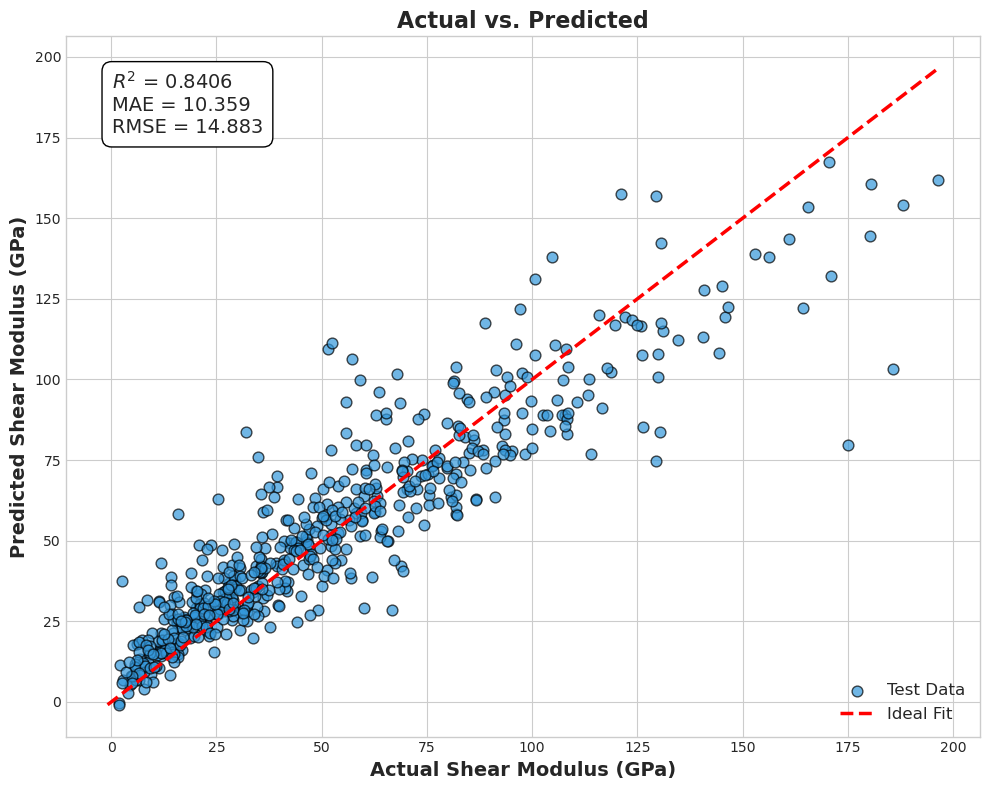

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os
import random
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from matminer.featurizers.composition import ElementProperty
from pymatgen.core.composition import Composition

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
print("!!! FORCING SCRIPT TO RUN ON GPU 0 ONLY !!!")
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Enabled memory growth for {len(gpus)} GPUs")
    except RuntimeError as e:
        print(e)

warnings.filterwarnings('ignore')

# --- 1. ULTRA SETUP AND REPRODUCIBILITY ---
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# --- 2. ADVANCED DATA PROCESSING ---
print(" =================== Starting 3-Branch Keras Fusion Model Training =================== ")
df = pd.read_csv('6059_rows.csv')
X_3d_data, y_data = [], []
input_dir = 'input_cnn'
formula_list = []

for _, row in df.iterrows():
    file_path = os.path.join(input_dir, f"{row['formula_sp']}_latent.npy")
    if os.path.exists(file_path):
        X_3d_data.append(np.load(file_path))
        y_data.append(row['shear_hill'])
        formula_list.append(row['formula_pretty'])
        
X, y = np.array(X_3d_data), np.array(y_data)
if X.ndim == 5 and X.shape[1] == 16 and X.shape[2] == 16 and X.shape[3] == 16:
    print(f"Loaded {X.shape[0]} 3D samples with shape {X.shape[1:]}.")
    INPUT_SHAPE_3D = X.shape[1:]
else:
     raise ValueError(f"Loaded data is not 16x16x16. Shape is {X.shape}.")

def remove_outliers_advanced(X, y, formulas):
    Q1, Q3 = np.percentile(y, [10, 90]); IQR = Q3 - Q1
    mask1 = (y >= (Q1 - 2 * IQR)) & (y <= (Q3 + 2 * IQR))
    z_scores = np.abs(stats.zscore(y)); mask2 = z_scores < 3.5
    mask = mask1 & mask2
    print(f"Removed {len(y) - np.sum(mask)} outliers")
    formulas_out = [formulas[i] for i in range(len(formulas)) if mask[i]]
    return X[mask], y[mask], formulas_out

X, y, formula_list = remove_outliers_advanced(X, y, formula_list)
print(f"Data shape after advanced outlier removal: {X.shape}")

# --- 2.5 FEATURE GENERATION & SCALING ---
print("\n =================== Generating Magpie Features ===================")
X_magpie = np.array([]) 
X_magpie_scaled = np.array([])
ep_featurizer = ElementProperty.from_preset("magpie")
try:
    compositions = [Composition(f) for f in formula_list]
    if compositions:
        X_magpie = ep_featurizer.featurize_many(compositions)
        X_magpie = np.array(X_magpie)
        X_magpie = np.nan_to_num(X_magpie, nan=0.0, posinf=0.0, neginf=0.0)
        print(f"Generated Magpie features with shape: {X_magpie.shape}")
    else:
        raise ValueError("No compositions found after parsing.")
except Exception as e:
    raise ValueError(f"Error parsing formulas: {e}. Check your 'formula_sp' column.")

print("\n =================== Generating PCA & Scaled Features ===================")
X_flat = X.reshape(X.shape[0], -1)

# Fit all scalers for this script's training run
X_cnn = X / np.max(X) if np.max(X) != 0 else X # This is cnn_max_value
X_flat_scaled = StandardScaler().fit_transform(X_flat)
X_magpie_scaled = StandardScaler().fit_transform(X_magpie)
scaler_y = RobustScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

n_components_pca = 512
pca = PCA(n_components=n_components_pca, random_state=seed_value)
X_pca_scaled = pca.fit_transform(X_flat_scaled)
print(f"PCA complete. Explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")

# --- 3. CROSS-VALIDATION BASED SPLITTING ---
print("\n =================== Creating advanced data splits =================== ")
kf = KFold(n_splits=5, shuffle=True, random_state=seed_value)
train_idx, temp_idx = next(kf.split(y))
val_idx, test_idx = train_test_split(temp_idx, test_size=0.5, random_state=seed_value)

# Create splits for ALL data types
X_train_3d, X_val_3d, X_test_3d = X_cnn[train_idx], X_cnn[val_idx], X_cnn[test_idx]
X_train_pca, X_val_pca, X_test_pca = X_pca_scaled[train_idx], X_pca_scaled[val_idx], X_pca_scaled[test_idx]
X_train_magpie, X_val_magpie, X_test_magpie = X_magpie_scaled[train_idx], X_magpie_scaled[val_idx], X_magpie_scaled[test_idx]
y_train, y_val, y_test = y_scaled[train_idx], y_scaled[val_idx], y_scaled[test_idx]

print(f"3D CNN splits -> Train: {X_train_3d.shape}, Val: {X_val_3d.shape}")
print(f"PCA splits -> Train: {X_train_pca.shape}, Val: {X_val_pca.shape}")
print(f"Magpie splits -> Train: {X_train_magpie.shape}, Val: {X_val_magpie.shape}")

# --- 3.6 BATCH SIZE ---
batch_size = 8
print(f" Using batch size: {batch_size}")

# --- 4. FUSION MODEL ARCHITECTURE ---

@tf.keras.utils.register_keras_serializable()
class DualAttention3D(layers.Layer):
    """ Custom Dual-Attention (Channel + Spatial) Layer """
    def __init__(self, reduction_ratio=16, **kwargs):
        super(DualAttention3D, self).__init__(**kwargs)
        self.reduction_ratio = reduction_ratio
    def build(self, input_shape):
        self.channels = input_shape[-1]; self.global_avg_pool=layers.GlobalAveragePooling3D(); self.global_max_pool=layers.GlobalMaxPooling3D()
        self.dense1=layers.Dense(units=max(self.channels // self.reduction_ratio, 8), activation='relu'); self.dense2=layers.Dense(units=self.channels, activation='sigmoid')
        self.conv1=layers.Conv3D(2, 3, padding='same', activation='relu'); self.conv2=layers.Conv3D(1, 3, padding='same', activation='sigmoid')
        super(DualAttention3D, self).build(input_shape)
    def call(self, inputs):
        avg_pool=self.global_avg_pool(inputs); max_pool=self.global_max_pool(inputs)
        avg_pool=layers.Reshape((1,1,1,self.channels))(avg_pool); max_pool=layers.Reshape((1,1,1,self.channels))(max_pool)
        channel_avg=self.dense2(self.dense1(avg_pool)); channel_max=self.dense2(self.dense1(max_pool)); channel_attention=layers.Add()([channel_avg, channel_max])
        x=layers.Multiply()([inputs, channel_attention]); spatial_avg=tf.reduce_mean(x, axis=-1, keepdims=True); spatial_max=tf.reduce_max(x, axis=-1, keepdims=True)
        spatial_concat=tf.concat([spatial_avg, spatial_max], axis=-1); spatial_attention=self.conv2(self.conv1(spatial_concat))
        output=layers.Multiply()([x, spatial_attention]); return output
    def get_config(self):
        config = super(DualAttention3D, self).get_config()
        config.update({"reduction_ratio": self.reduction_ratio})
        return config

@tf.keras.utils.register_keras_serializable()
class RandomFlip3D(layers.Layer):
    """ Custom Random Flip 3D Layer """
    def __init__(self, seed=None, **kwargs):
        super(RandomFlip3D, self).__init__(**kwargs); self.seed = seed
    def call(self, inputs, training=None):
        if training:
            x = inputs
            x = tf.cond(tf.random.uniform((), seed=self.seed) > 0.5, lambda: tf.reverse(x, axis=[1]), lambda: x)
            x = tf.cond(tf.random.uniform((), seed=self.seed) > 0.5, lambda: tf.reverse(x, axis=[2]), lambda: x)
            x = tf.cond(tf.random.uniform((), seed=self.seed) > 0.5, lambda: tf.reverse(x, axis=[3]), lambda: x)
            return x
        return inputs
    def get_config(self):
        config = super(RandomFlip3D, self).get_config()
        config.update({"seed": self.seed})
        return config

def create_3branch_fusion_model(input_shape_3d, input_shape_pca, input_shape_magpie):
    """Builds the 3-branch Keras fusion model."""
    
    # --- Branch 1: 3D ResNet (Structural) ---
    input_3d = layers.Input(shape=input_shape_3d, name='input_3d')
    x_3d = RandomFlip3D(seed=seed_value)(input_3d) 
    x_3d = layers.Conv3D(64, 3, padding='same', kernel_initializer='he_normal')(x_3d)
    x_3d = layers.BatchNormalization()(x_3d); x_3d = layers.Activation('swish')(x_3d); x_3d = layers.MaxPooling3D(2)(x_3d)
    for filters in [64, 128, 256]:
        shortcut=x_3d; x_3d=layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x_3d); x_3d=layers.BatchNormalization()(x_3d); x_3d=layers.Activation('swish')(x_3d)
        x_3d=layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x_3d); x_3d=layers.BatchNormalization()(x_3d); x_3d = DualAttention3D()(x_3d)
        if shortcut.shape[-1] != filters: shortcut=layers.Conv3D(filters, 1, padding='same')(shortcut); shortcut=layers.BatchNormalization()(shortcut)
        x_3d=layers.Add()([x_3d, shortcut]); x_3d=layers.Activation('swish')(x_3d)
        shortcut=x_3d; x_3d=layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x_3d); x_3d=layers.BatchNormalization()(x_3d); x_3d=layers.Activation('swish')(x_3d)
        x_3d=layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x_3d); x_3d=layers.BatchNormalization()(x_3d); x_3d=layers.Add()([x_3d, shortcut]); x_3d=layers.Activation('swish')(x_3d)
    x_3d = DualAttention3D()(x_3d); x_3d = layers.GlobalAveragePooling3D()(x_3d)
    
    # --- Branch 2: 1D DenseNet (PCA Structural) ---
    input_pca = layers.Input(shape=input_shape_pca, name='input_pca')
    x_pca = layers.Dense(256, activation='swish')(input_pca)
    x_pca = layers.BatchNormalization()(x_pca); x_pca = layers.Dropout(0.3)(x_pca)
    x_pca = layers.Dense(128, activation='swish')(x_pca)
    x_pca = layers.BatchNormalization()(x_pca); x_pca = layers.Dropout(0.3)(x_pca)
    
    # --- Branch 3: 1D DenseNet (Magpie Compositional) ---
    input_magpie = layers.Input(shape=input_shape_magpie, name='input_magpie')
    x_magpie = layers.Dense(128, activation='swish')(input_magpie)
    x_magpie = layers.BatchNormalization()(x_magpie); x_magpie = layers.Dropout(0.2)(x_magpie)
    x_magpie = layers.Dense(64, activation='swish')(x_magpie)
    x_magpie = layers.BatchNormalization()(x_magpie); x_magpie = layers.Dropout(0.2)(x_magpie)
    
    combined = layers.Concatenate()([x_3d, x_pca, x_magpie])
    
    # --- Head: Final prediction layers ---
    x = layers.Dense(512, activation='swish', kernel_regularizer=regularizers.l2(1e-4))(combined)
    x = layers.BatchNormalization()(x); x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='swish', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x); x = layers.Dropout(0.4)(x)
    x = layers.Dense(128, activation='swish')(x)
    x = layers.Dropout(0.3)(x)
    output = layers.Dense(1, activation='linear')(x)
    
    model = models.Model(inputs=[input_3d, input_pca, input_magpie], outputs=output)
    
    model.compile(optimizer=AdamW(learning_rate=1e-4, weight_decay=1e-4),
                  loss='huber',
                  metrics=['mae'])
    return model

# --- 5. TRAINING ---
print("\n =================== Training 3-Branch Keras Fusion Model ===================")

model_filename = 'To_Publish_Shear_Modulus_Best.h5'
callbacks = [
    EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-7, verbose=1),
    ModelCheckpoint(model_filename, monitor='val_loss', save_best_only=True, verbose=1)
]

model_fusion = create_3branch_fusion_model(INPUT_SHAPE_3D, (n_components_pca,), (X_magpie_scaled.shape[1],))
model_fusion.summary()

X_train_inputs = {
    'input_3d': X_train_3d,
    'input_pca': X_train_pca,
    'input_magpie': X_train_magpie
}
X_val_inputs = {
    'input_3d': X_val_3d,
    'input_pca': X_val_pca,
    'input_magpie': X_val_magpie
}
X_test_inputs = {
    'input_3d': X_test_3d,
    'input_pca': X_test_pca,
    'input_magpie': X_test_magpie
}

history_fusion = model_fusion.fit(
    X_train_inputs, y_train,
    validation_data=(X_val_inputs, y_val),
    epochs=300,
    batch_size=batch_size,
    callbacks=callbacks,
    verbose=1
)

print(f"\nTraining complete. Best model saved as {model_filename}")

# --- 7. ULTIMATE EVALUATION ---
print("\n =================== Evaluating 3-Branch Fusion Model ===================")
print(f"Loading best weights from {model_filename} for final evaluation...")
model_fusion.load_weights(model_filename)

pred_fusion_scaled = model_fusion.predict(X_test_inputs, batch_size=batch_size, verbose=0).flatten()
pred_fusion_orig = scaler_y.inverse_transform(pred_fusion_scaled.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

final_r2 = r2_score(y_test_orig, pred_fusion_orig)
final_mae = mean_absolute_error(y_test_orig, pred_fusion_orig)
final_rmse = np.sqrt(mean_squared_error(y_test_orig, pred_fusion_orig))

print("\n" + "="*60); print(" =================== FINAL 3-BRANCH FUSION MODEL RESULTS ==================="); print("="*60)
print(f"Score:   {final_r2:.4f}")
print(f"MAE:        {final_mae:.4f}")
print(f"RMSE:       {final_rmse:.4f}"); print("="*60)

# --- 8. COMPREHENSIVE VISUALIZATION ---
print("Generating final plot...")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8)) # Create a single figure

# Use the variables from your Keras Fusion model
y_test_actual = y_test_orig
y_pred_actual = pred_fusion_orig
final_r2_score = final_r2
final_mae_score = final_mae
final_rmse_score = final_rmse

plt.scatter(y_test_actual, y_pred_actual, alpha=0.7, edgecolors='k', c='#3498db', s=60, label="Test Data")
ideal_line = [min(y_test_actual.min(), y_pred_actual.min()), max(y_test_actual.max(), y_pred_actual.max())]
plt.plot(ideal_line, ideal_line, 'r--', lw=2.5, label="Ideal Fit")

metrics_text = (
    fr'$R^2$ = {final_r2_score:.4f}' + '\n' +
    fr'MAE = {final_mae_score:.3f}' + '\n' +
    fr'RMSE = {final_rmse_score:.3f}'
)
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='left',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel("Actual Shear Modulus (GPa)", fontsize=14, fontweight='bold')
plt.ylabel("Predicted Shear Modulus (GPa)", fontsize=14, fontweight='bold')
plt.title(r'Actual vs. Predicted', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()

plot_filename = 'To_Publish_Shear_Modulus_Best.png'
plt.savefig(plot_filename, dpi=300)
plt.show()
# --- End of Visualization Section ---